In [28]:
pip install geopandas

In [3]:
pip install pyspark

     |████████████████████████████████| 204.2MB 74kB/s 
     |████████████████████████████████| 204kB 43.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=6876921d54aa5bf75bf31bd059c56a99048008cde72e6fafd66c44c40f1b5315
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas
import math
import time
from pyspark.sql.functions import col
np.random_state=42

In [5]:
from pyspark import SparkContext,SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [15]:
data = sqlContext.read.csv('devicestatus.txt',inferSchema= True,header=None)

In [16]:
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)



In [17]:
data.show(5)

+--------------------+--------------------+--------------------+----+----+----+-------+--------+---------+-------+----+----+-------------+--------------+
|                 _c0|                 _c1|                 _c2| _c3| _c4| _c5|    _c6|     _c7|      _c8|    _c9|_c10|_c11|         _c12|          _c13|
+--------------------+--------------------+--------------------+----+----+----+-------+--------+---------+-------+----+----+-------------+--------------+
| 2014-03-15:10:10:20|       Sorrento F41L|8cc3b47e-bd01-448...|   7|  24|  39|enabled|disabled|connected|     55|  67|  12|33.6894754264|-117.543308253|
|2014-03-15:10:10:...|                null|                null|null|null|null|   null|    null|     null|   null|null|null|         null|          null|
|2014-03-15:10:10:...|                null|                null|null|null|null|   null|    null|     null|   null|null|null|         null|          null|
| 2014-03-15:10:10:20|       Sorrento F41L|707daba1-5640-4d6...|   8|  22|  

In [18]:
for column in data.columns:
    data = data.where(col(column).isNotNull())

In [19]:
data_extracted = data[['_c0','_c1','_c2','_c12','_c13']]


In [21]:
data_extracted = data_extracted.toDF(*['date','model','device ID','latitude','longitude'])
data_extracted = data_extracted.toPandas()

In [22]:
data_extracted = data_extracted[(data_extracted['latitude'] != 0) & (data_extracted['longitude'] != 0 )]

In [24]:
df = [model.split() for model in data_extracted.model]

In [25]:
s=' '
manufacturer,model = [],[]
for value in df:
    manufacturer.append(value[0])
    model.append(s.join(value[1:]))
    
data_extracted.model = model
data_extracted['manufacturer'] = manufacturer

In [26]:
data_extracted.to_csv('data_extracted.csv',index=None)

In [30]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

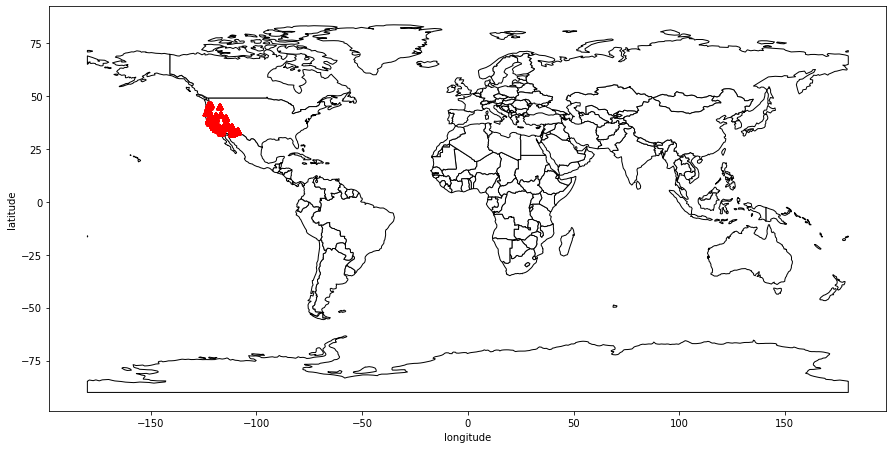

In [31]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_aspect('equal')
world.plot(ax=ax,color='white', edgecolor='black')
data_extracted.plot(kind='scatter',x='longitude',y='latitude',ax=ax,color='r',marker='^')
plt.show()